In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_247791/1328968367.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='format', y='word_sc_change', data=data, palette='Set2')
/tmp/ipykernel_247791/1328968367.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='format', y='digit_sc_change', data=data, palette='Set2')
/tmp/ipykernel_247791/1328968367.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='format', y='sequence_accuracy_change', data=data, palette='Set2')


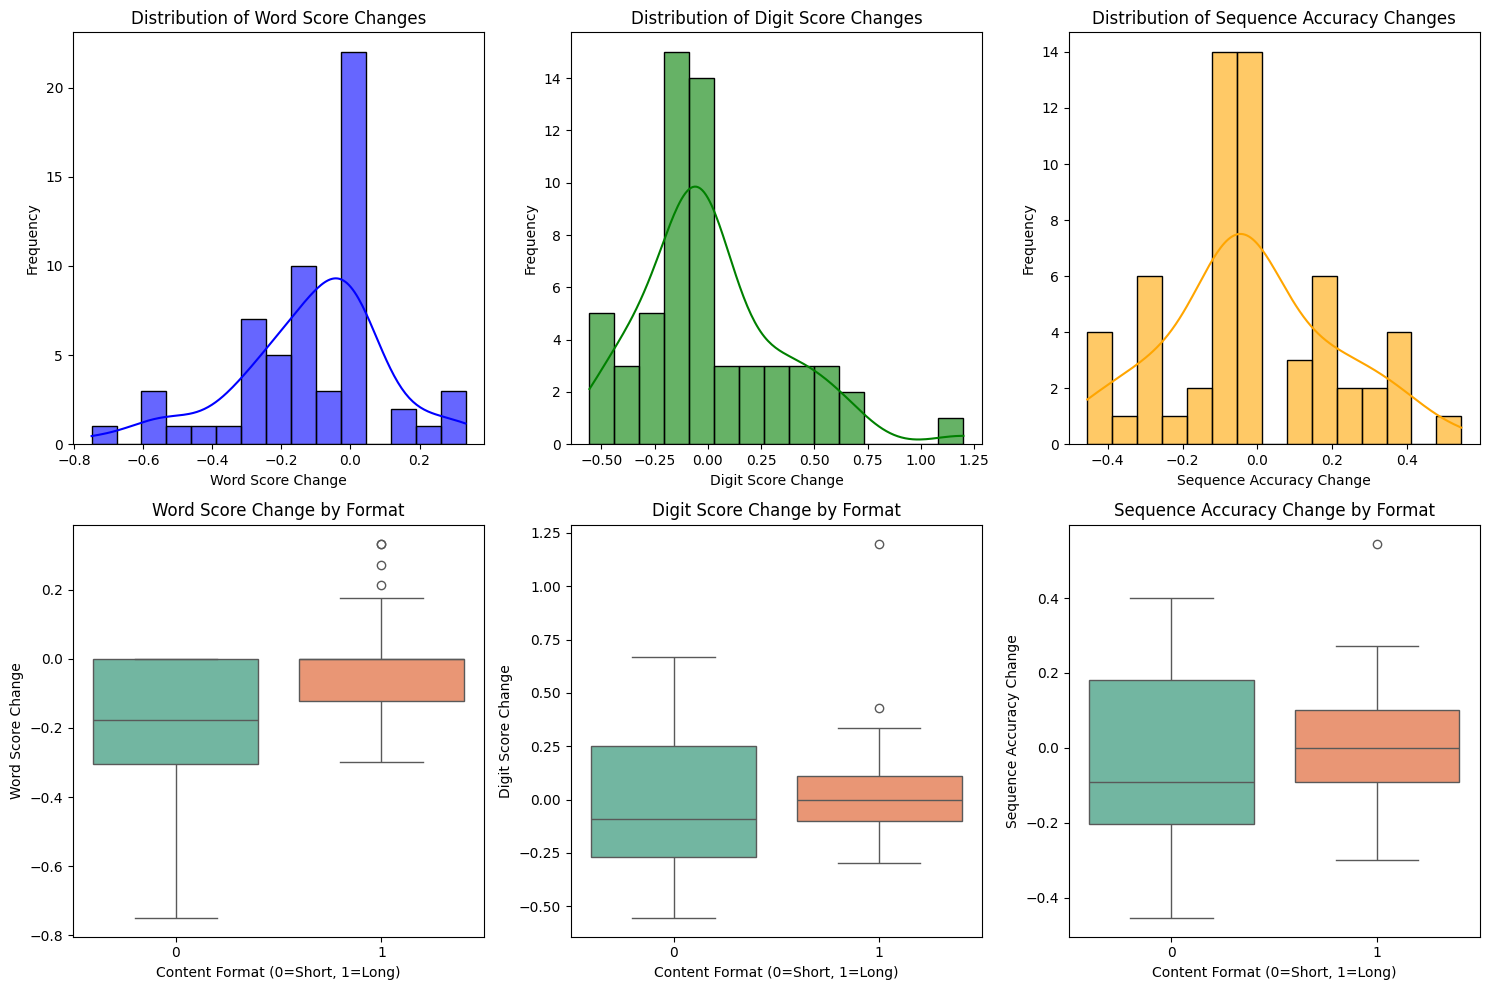

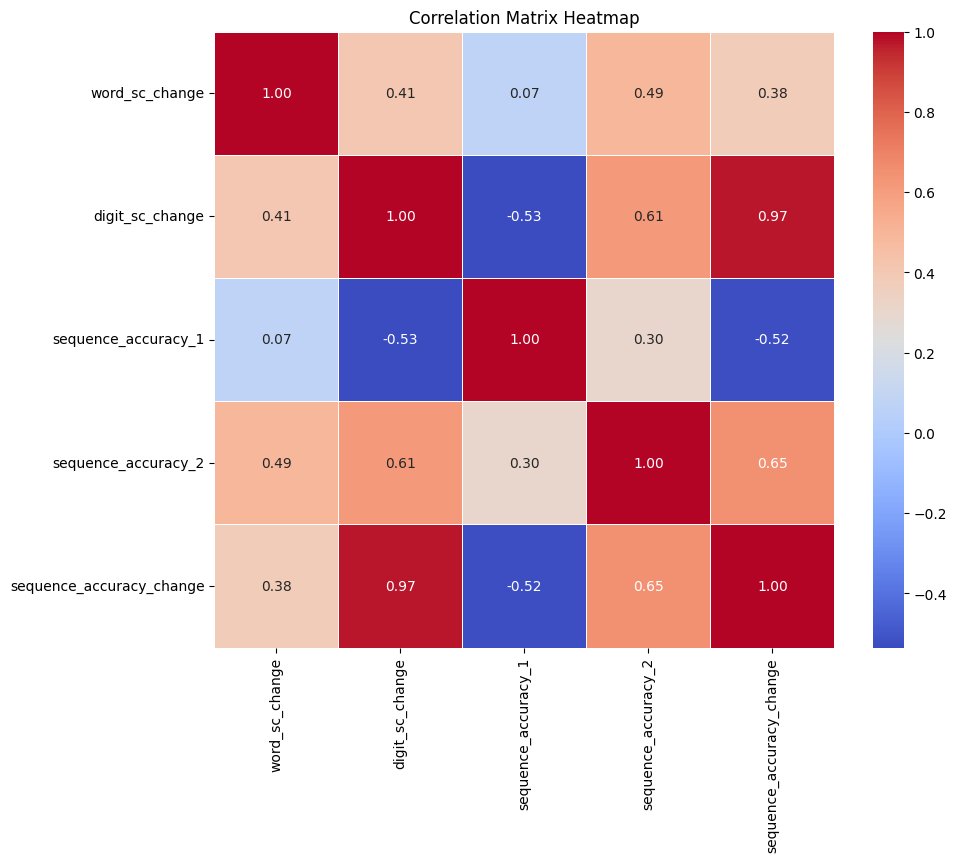

Summary Statistics:
       word_score_1  word_score_2  word_sc_change     format  digit_score_1  \
count     60.000000     60.000000       60.000000  60.000000      60.000000   
mean      87.916667     77.750000       -0.113848   0.466667      83.318182   
std       12.798691     20.219662        0.215160   0.503098      18.044803   
min       55.000000     25.000000       -0.750000   0.000000      36.363636   
25%       85.000000     70.000000       -0.182353   0.000000      70.000000   
50%       85.000000     85.000000       -0.057190   0.000000      90.909091   
75%      100.000000     90.000000        0.000000   1.000000     100.000000   
max      100.000000    100.000000        0.333333   1.000000     100.000000   

       digit_score_2  digit_sc_change  test_duration_seconds  \
count      60.000000        60.000000              60.000000   
mean       81.530303         0.016285             326.650000   
std        20.267501         0.331282              52.424546   
min        2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Load the dataset
data = pd.read_csv('memory_tests_rows_norm.csv')

# Convert durations to seconds for easier analysis
def duration_to_seconds(duration):
    if isinstance(duration, str):
        parts = duration.split(" ")
        seconds = 0
        for part in parts:
            if "m" in part:
                seconds += int(part.replace("m", "")) * 60
            elif "s" in part:
                seconds += int(part.replace("s", ""))
        return seconds
    return np.nan

# Apply the function to test and break durations
data['test_duration_seconds'] = data['test_duration'].apply(duration_to_seconds)
data['break_duration_seconds'] = data['break_duration'].apply(duration_to_seconds)

# Parse timestamps into datetime objects for time analysis
timestamp_cols = [col for col in data.columns if 'start' in col or 'end' in col]
for col in timestamp_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Compute sequence accuracy
data['correct_sequence_1'] = data['correct_sequence_1'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['user_sequence_1'] = data['user_sequence_1'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['correct_sequence_2'] = data['correct_sequence_2'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['user_sequence_2'] = data['user_sequence_2'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data['sequence_accuracy_1'] = data.apply(
    lambda row: sum(np.array(row['correct_sequence_1']) == np.array(row['user_sequence_1'])) / len(row['correct_sequence_1']), axis=1
)
data['sequence_accuracy_2'] = data.apply(
    lambda row: sum(np.array(row['correct_sequence_2']) == np.array(row['user_sequence_2'])) / len(row['correct_sequence_2']), axis=1
)
data['sequence_accuracy_change'] = data['sequence_accuracy_2'] - data['sequence_accuracy_1']

# Summary statistics for numeric columns
numeric_summary = data.describe()

# Correlation matrix for numeric variables
numeric_columns = ['word_sc_change', 'digit_sc_change', 'sequence_accuracy_1', 'sequence_accuracy_2', 'sequence_accuracy_change']
correlation_matrix = data[numeric_columns].corr()

# Perform statistical tests
word_changes_short = data[data['format'] == 0]['word_sc_change']
word_changes_long = data[data['format'] == 1]['word_sc_change']
digit_changes_short = data[data['format'] == 0]['digit_sc_change']
digit_changes_long = data[data['format'] == 1]['digit_sc_change']

# T-tests
word_ttest = ttest_ind(word_changes_short, word_changes_long, equal_var=False)
digit_ttest = ttest_ind(digit_changes_short, digit_changes_long, equal_var=False)

# Mann-Whitney U tests
word_mannwhitney = mannwhitneyu(word_changes_short, word_changes_long, alternative='two-sided')
digit_mannwhitney = mannwhitneyu(digit_changes_short, digit_changes_long, alternative='two-sided')

# Visualizations
plt.figure(figsize=(15, 10))

# Word score change distribution
plt.subplot(2, 3, 1)
sns.histplot(data['word_sc_change'], kde=True, bins=15, color='blue', alpha=0.6)
plt.title('Distribution of Word Score Changes')
plt.xlabel('Word Score Change')
plt.ylabel('Frequency')

# Digit score change distribution
plt.subplot(2, 3, 2)
sns.histplot(data['digit_sc_change'], kde=True, bins=15, color='green', alpha=0.6)
plt.title('Distribution of Digit Score Changes')
plt.xlabel('Digit Score Change')
plt.ylabel('Frequency')

# Sequence accuracy change distribution
plt.subplot(2, 3, 3)
sns.histplot(data['sequence_accuracy_change'], kde=True, bins=15, color='orange', alpha=0.6)
plt.title('Distribution of Sequence Accuracy Changes')
plt.xlabel('Sequence Accuracy Change')
plt.ylabel('Frequency')

# Boxplots for score changes by format
plt.subplot(2, 3, 4)
sns.boxplot(x='format', y='word_sc_change', data=data, palette='Set2')
plt.title('Word Score Change by Format')
plt.xlabel('Content Format (0=Short, 1=Long)')
plt.ylabel('Word Score Change')

plt.subplot(2, 3, 5)
sns.boxplot(x='format', y='digit_sc_change', data=data, palette='Set2')
plt.title('Digit Score Change by Format')
plt.xlabel('Content Format (0=Short, 1=Long)')
plt.ylabel('Digit Score Change')

plt.subplot(2, 3, 6)
sns.boxplot(x='format', y='sequence_accuracy_change', data=data, palette='Set2')
plt.title('Sequence Accuracy Change by Format')
plt.xlabel('Content Format (0=Short, 1=Long)')
plt.ylabel('Sequence Accuracy Change')

plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Summary of statistical tests
stat_test_results = pd.DataFrame({
    "Test": ["T-Test (Word)", "T-Test (Digit)", "Mann-Whitney (Word)", "Mann-Whitney (Digit)"],
    "Statistic": [word_ttest.statistic, digit_ttest.statistic, word_mannwhitney.statistic, digit_mannwhitney.statistic],
    "P-Value": [word_ttest.pvalue, digit_ttest.pvalue, word_mannwhitney.pvalue, digit_mannwhitney.pvalue]
})

print("Summary Statistics:")
print(numeric_summary)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nStatistical Test Results:")
print(stat_test_results)


Here is a comprehensive list of insights based on the exploratory data analysis (EDA) and statistical analyses:

---

### **1. General Summary**
- **Word and Digit Score Changes**:
  - Word scores decreased on average after viewing content, especially for short-form content.
  - Digit scores showed minimal change, with no significant differences between content formats.
- **Sequence Accuracy**:
  - Participants generally retained or slightly improved their sequence accuracy after the content, especially in the long-form group.

---

### **2. Statistical Tests**
- **Word Score Changes**:
  - Significant difference (\(p < 0.001\)) between short-form and long-form content, with long-form leading to better retention or smaller decreases.
- **Digit Score Changes**:
  - No significant difference between formats.
- **Sequence Accuracy Changes**:
  - Improved slightly more with long-form content but varied across participants.

---

### **3. Correlations**
- **Strong Positive Correlations**:
  - **Digit score change** and **sequence accuracy change** (\(r = 0.97\)).
  - **Post-test sequence accuracy** and **sequence accuracy change** (\(r = 0.65\)).
- **Weaker Correlations**:
  - **Word score change** correlates moderately with **sequence accuracy change** (\(r = 0.38\)) and **post-test sequence accuracy** (\(r = 0.49\)).
- **Negative Correlation**:
  - Pre-test sequence accuracy negatively correlates with **digit score change** (\(r = -0.53\)), suggesting participants with higher initial accuracy saw smaller improvements in digit scores.

---

### **4. Distribution Insights**
- **Word Score Changes**:
  - Short-form content shows a wider range of decreases, with more participants performing worse after the content.
  - Long-form content results in smaller decreases or consistent scores.
- **Digit Score Changes**:
  - More uniform across formats, with changes centered around zero.
- **Sequence Accuracy Changes**:
  - Most participants either retained or slightly improved their sequence accuracy post-content.

---

### **5. Format-Based Insights**
- **Short-Form Content (Format: 0)**:
  - Larger decreases in word score changes.
  - Minimal impact on digit scores and sequence accuracy.
- **Long-Form Content (Format: 1)**:
  - Better retention of word scores and slight improvements in sequence accuracy.

---

### **6. Visual Insights**
- **Boxplots**:
  - Highlight greater variability in score and sequence changes for short-form content.
- **Heatmap**:
  - Reveals strong relationships between digit and sequence metrics, while word scores are less correlated with other variables.

---

### **Next Steps**
- **Targeted Analysis**:
  - Investigate individual-level patterns for participants with extreme score changes.
- **Feature Engineering**:
  - Explore time-related metrics, such as task durations, for their potential influence on performance.
- **Behavioral Insights**:
  - Analyze participant comments to correlate subjective feedback with performance metrics.

Let me know if you'd like further elaboration or additional analyses!